<center>
    <h2> European Hotel Reviews </h2>
    
This notebook provides visualisation of European hotel reviews and relationship between the data.  
    
<h2> Description of Data </h2>

The data used in this notebook comes from https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe. The data contains different hotel reviews based on the customer experience across Europe from the year 2015 to 2017.
    
The data includes 515,000 rows of customer reviews and scoring of 1493 hotels across Europe. Each row represents an observation of unique set values and it contains the attributes shown in the table below.

| Attribute | Description| Type |
| --- | ---------- | --- |
| Hotel_Address | Address of hotel | String
| Review_Date | The date when the reviewer posted the review | DateTime
| Average_Score | Average score of the hotel | Float
| Hotel_Name | Name of hotel | String
| Reviewer_Nationality | Nationality of the reviewer | String
| Negative_Review | Negative review the reviewer gave to the hotel | String
| Review_Total_Negative_Word_Counts | Total number of words in the negative review | Integer
| Positive_Review | Positive review the reviewer gave to the hotel | String
| Review_Total_Positive_Word_Counts | Total number of words in the positive review | Integer
| Reviewer_Score | The score of the reviewer based on the customers' experience | Float
| Total_Number_of_Reviews_Reviewer_Has_Given | Number of reviews the reviewers has given in the past | Integer
| Tags | Tags the reviewer has given | String
| days_since_review | Duration between the review date and the scrape date | String
| Additional_Number_of_Scoring | Customers who made scoring on the service but not review | Integer
| lat | Latitude of the hotel | Float
| lng | Longitude of the hotel | Float



### Importing modules

Sentry is an open-source error tracking tool to find the problems that we may encounter. sentry_SDK and sentry_support modules are for capturing manual errors and other events. Traceback is another module in python to extract, format and print stack traces of a program. Here I need to print the stack trace and see when an exception occurs. The pandas library is used for data manipulation and analysis. Importing NumPy module generates an array of random numbers and so various mathematical operations. The imported datetime module is used for manipulating dates and times. The matplotlib.pyplot is a sub-library in the matplotlib module for plotting/representing the data visually. The seaborn module is used for statistical data visualisation. 

In [1]:
import sentry_sdk
import sentry_support
import traceback
import pandas as pd  
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns
# Plot is described directly below the cell 
%matplotlib inline

## Description of data

In the below cell, I have read the data 'Hotel_Reviews.csv' file using pandas module and displayed the first five rows of the dataset.

In [2]:
try:
    # Reading csv file
    data = pd.read_csv('Hotel_Reviews.csv',parse_dates=['Review_Date'])
    print("The first five rows in 'Hotel_Reviews.csv' :")

    # See first five rows
    print(data.head(5))

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)     


The first five rows in 'Hotel_Reviews.csv' :
                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1            

#### Describing data

The dataframe.columns method displays the column labels of the dataframe. The dataframe.shape returns a tuple value of rows and columns.The dataframe.info() prints the information about the dataframe including the index dtype and columns, non-null values and memory usage. I have used these to describe the Hotel_Reviews data.

In [3]:
try:
    # Displays column values
    print("The attributes in the dataset are :\n",data.columns)
    print("")
    
    # Displays shape of the data
    print("The shape of the data : ",data.shape)
    print("")
    
    # Displays information about the data
    print("The information about the data :\n")
    data.info()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   

The attributes in the dataset are :
 Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

The shape of the data :  (515738, 17)

The information about the data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date 

The dataframe.describe() specifies the statistical details such as count, mean, standard deviation etc...

In [4]:
try:
    
    print("Description of the data :",data.describe())
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e) 

Description of the data :        Additional_Number_of_Scoring  Average_Score  \
count                 515738.000000  515738.000000   
mean                     498.081836       8.397487   
std                      500.538467       0.548048   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      341.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                            29.690831              2317.464868   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75% 

In the below cell, I have used isnull().sum() function to find the missing or invalid data in the dataframe. I have printed the values and found that latitude and longitude attributes has 3268 missing values. Hence, replacing the values with 0 by using fillna() function. This function replaces all the missing values to 0. After replacing, I have no missing values in the dataset. 

In [5]:
try:
    # To find missing or invalid data
    print(data.isnull().sum())
    
    # Filling the missing values using fillna()
    data['lat'] = data['lat'].fillna(0)
    data['lng'] = data['lng'].fillna(0)
    
    # After adding values to the missing data
    print("After adding values \n",data.isnull().sum())
    
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e) 

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64
After adding values 
 Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Re

Here, in the below cell, I have splitted the hotel address attribute into 2 attributes City and Country by using split() function. From the hotel address, I can take the last two words that contains City and Country. I have printed the new column values showing city and country for each hotel. I have used str.split() that has the list values separately. Hence, I am extracting only the string element from that values. I have printed the string elements for the city and country. 

In [6]:
try:
    # Splitting the address values and adding columns 'Country' and 'City'
    data['Country'] = data.Hotel_Address.str.split().str[-1:]
    data['City'] = data.Hotel_Address.str.split().str[-2:-1]
    
    print("Country and city values :\n",data.Country,data.City)
    
    # To change from list values to the string values
    data['Country'] = data['Country'].str.get(0)
    data['City'] = data['City'].str.get(0)
    print("After changing Country and city values :\n",data.Country,data.City)
    

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e) 

Country and city values :
 0         [Netherlands]
1         [Netherlands]
2         [Netherlands]
3         [Netherlands]
4         [Netherlands]
              ...      
515733        [Austria]
515734        [Austria]
515735        [Austria]
515736        [Austria]
515737        [Austria]
Name: Country, Length: 515738, dtype: object 0         [Amsterdam]
1         [Amsterdam]
2         [Amsterdam]
3         [Amsterdam]
4         [Amsterdam]
             ...     
515733       [Vienna]
515734       [Vienna]
515735       [Vienna]
515736       [Vienna]
515737       [Vienna]
Name: City, Length: 515738, dtype: object
After changing Country and city values :
 0         Netherlands
1         Netherlands
2         Netherlands
3         Netherlands
4         Netherlands
             ...     
515733        Austria
515734        Austria
515735        Austria
515736        Austria
515737        Austria
Name: Country, Length: 515738, dtype: object 0         Amsterdam
1         Amsterdam
2         A

In [7]:
try:
    # Replacing 'Kingdom' value as 'United Kingdom' 
    data['Country'].replace(to_replace ="Kingdom",
                  value ="United Kingdom",inplace = True)
    data['City'].replace(to_replace = "United",value = "London",inplace = True)
    
    # Reviewer_Nationality column has tailing and leading spaces
    # Removing spaces using str.strip()
    data['Reviewer_Nationality'] = data['Reviewer_Nationality'].str.strip()
    
    # After adding column values
    print("The shape of the datset is : ",data.shape)
    
    # Checking the info of the dataset
    print("The new information of the data :\n")
    data.info()

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e) 

The shape of the datset is :  (515738, 19)
The new information of the data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 

### Distribution based on average score values

In this below code, I am printing the unique city and country values based on the unique() function. The unique() extracts the distinct elements from the specified column. In this dataset, I have only six countries and six cities across Europe. The countries include 'Netherlands','United Kingdom','France','Spain','Italy','Austria' and the cities are 'Amsterdam','London','Paris','Barcelona','Milan','Vienna'. 

Then, after this I am plotting the histogram to show the distribution based on the Average Score values and the frequency of occurring. In x-axis, I am having the values of average score and in y-axis, I am having the frequency of occurrence of the average values. 

From this plot, I can infer that the average score values with high frequency ranges from 8 to 8.8 where other ranges are less when compared with the high range values. Thus, I have more occurrences of average score values ranging from 8 to 9. 

The countries mentioned in the dataset are :
 ['Netherlands' 'United Kingdom' 'France' 'Spain' 'Italy' 'Austria']
The cities mentioned in the dataset are :
 ['Amsterdam' 'London' 'Paris' 'Barcelona' 'Milan' 'Vienna']


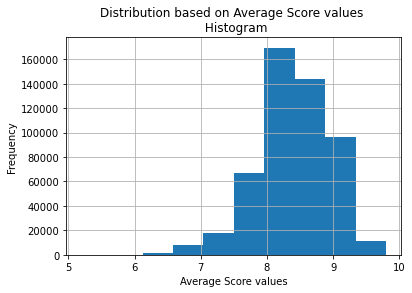

In [8]:
try:
    print("The countries mentioned in the dataset are :\n",data['Country'].unique())

    print("The cities mentioned in the dataset are :\n",data['City'].unique())
    
    # Plotting a histogram for a specific column
    data.hist(column = "Average_Score")
    plot.title("Distribution based on Average Score values \n Histogram")
    plot.xlabel("Average Score values")
    plot.ylabel("Frequency")
    

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e) 

### Distribution based on average score values (Contd.)

I am going to use countplot to display the counts of observations in average score using bars. First, I have plotted the histogram plot to see the frequency distribution. Here, I am plotting the average score against the count values by using countplot() in seaborn. Atfirst, I am dropping the duplicate values to find the correct number of average score of count values. Then, I am plotting the graph by giving appropriate x and y axis labels for the plot. I can infer that average score count values are more in the specific range i.e. 8.1 to 8.8 and it gradually decresaes.


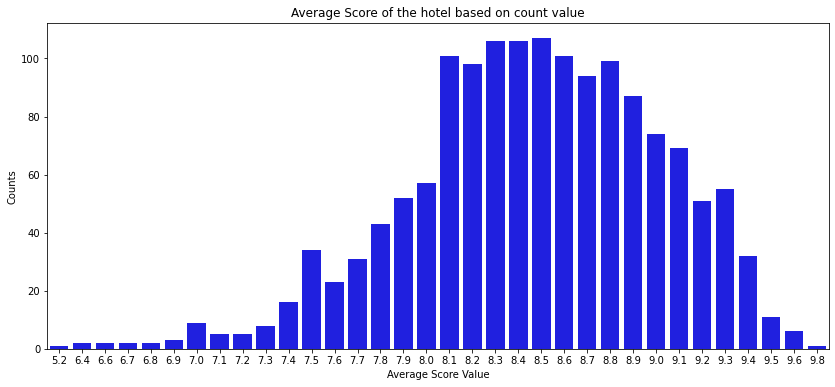

In [9]:
try:

    # Plotting the Average scores of the hotels
    df = data[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates

    # Specifying the size of the plot
    plot.figure(figsize = (14,6))

    # Using countplot() to plot the distribution
    sns.countplot(x = 'Average_Score',data = df,color = 'blue')
    plot.xlabel("Average Score Value")
    plot.ylabel("Counts")
    plot.title("Average Score of the hotel based on count value")
    
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e) 

### How the ratings values are compared across each country?

Here, I am plotting the graph to compare the ratings of different hotels across countries in Europe. I have used the boxplot() function to create a boxplot based on the group by value. Here, groupby column is 'Country' and having a Average_Score column to see the comparison of the country which has highest rating values. I have differentiated the median value with green color and plotted the title of the graph. From this graph, it is clear that the distribution of average score values for the country Austria, it has high average ratings wnen compared to other countries and the country has no outliers. Here outliers are the abnormal distance from the other age values that are represented as small cicles 'o' that classifies the minimum and maximum values in the graph. The blue colour rectangular box represents the Interquartile range values.

As I have inferred that there are only 6 countries available in the dataset, I am plotting the x-axis with 6 different countries and their average score values on y-axis. From this plot, I infer that Austria has high hotel ratings when compared to other countries average values. 

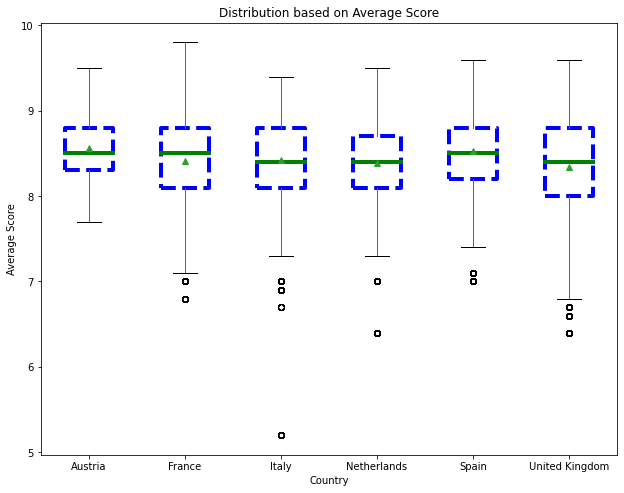

In [10]:
try:

    box = dict(linestyle='--', linewidth=4, color='b')
    median = dict(linestyle='-', linewidth=4, color='g')
    data.boxplot(by='Country', 
                       column=['Average_Score'], 
                       grid=False,figsize = (10,8), showmeans = True, boxprops=box,
                       medianprops=median)

    # Title of the plot
    plot.title("Distribution based on Average Score")
    # get rid of the automatic title
    plot.suptitle("")

    # Setting y label
    plot.ylabel("Average Score")
    plot.show()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Finding relationship between all numerical data in the dataframe

In the dataset, there are nine numerical attributes. I am comparing the relationship between all the numerical attributes with each column against the other columns to see how the variables are related.

From this plot, I infer that most of the plots are linear that is either horizontal and vertical plots. If I see the reviewer score plot, it doesn't get affected by any other variables. Therefore, it means that each value is correlated with other variables based on the reviewer score.


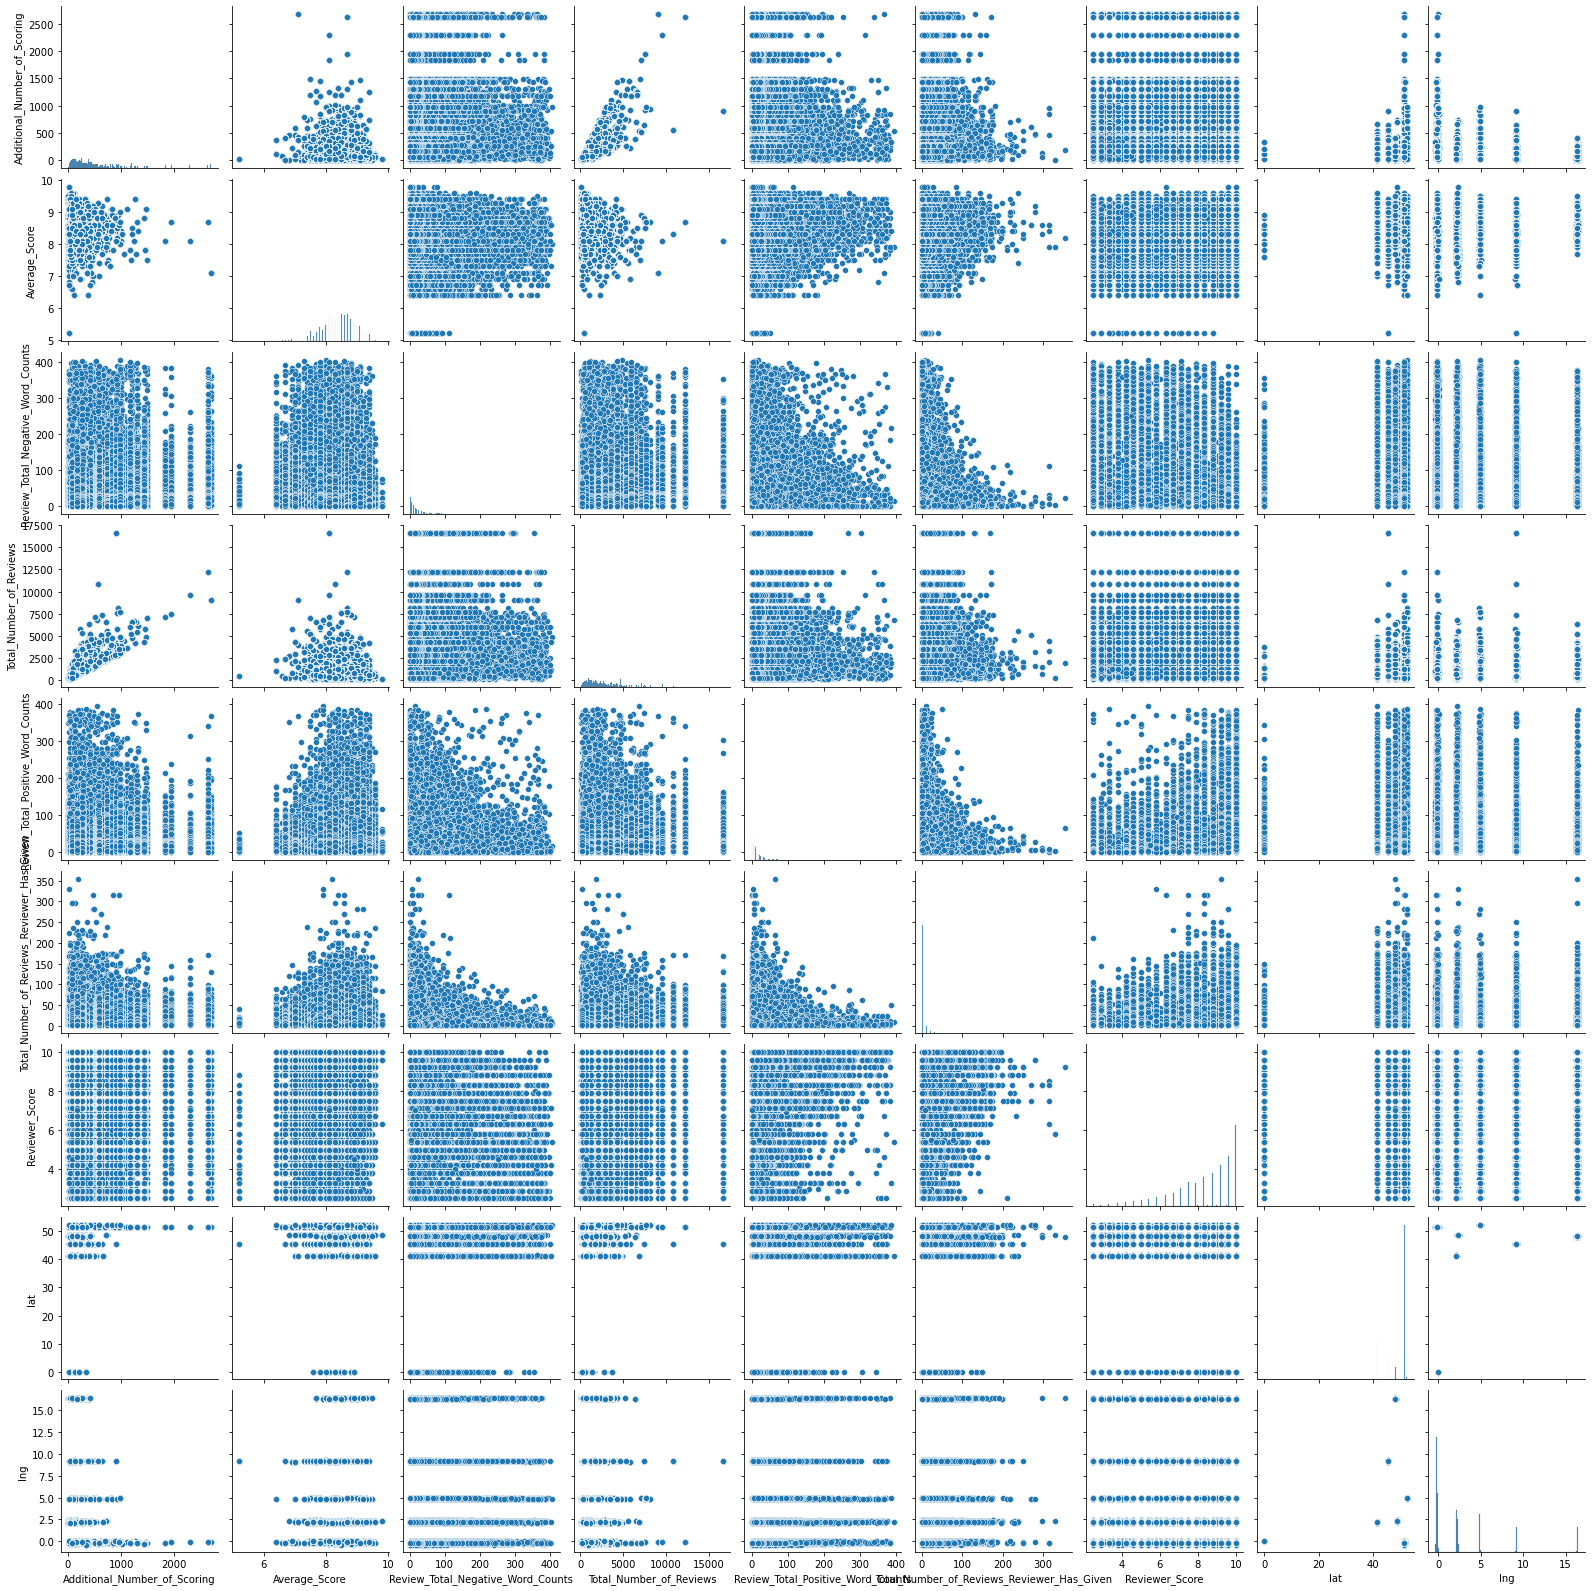

In [11]:
try:
    # Plotting pairplot across each other columns

    sns.pairplot(data)
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Distribution based on Reviewer score values

I am going to use histplot to display the count values of observations in reviewer score. First, I have plotted the histogram plot to see the frequency distribution. Here, I am plotting the reviewer score against the count values by using histplot() in seaborn. I am plotting the graph by giving reviewer score value for the plot. I can infer that the reviewer score count values has more number of score as 10 when compared to the other values. 


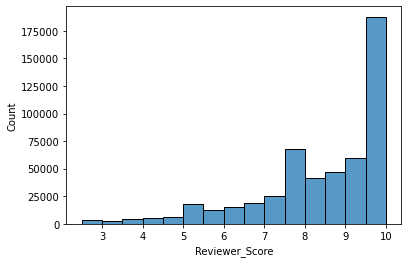

In [12]:
try:
    # Plotting the graph
    sns.histplot(data["Reviewer_Score"],kde=False,bins=15)
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Which is the top and least reviewing countries based on the reviewers nationality?

I have taken the Reviewer_Nationality column and found the value_counts of that column. value_counts() returns a series with unique count values in the dataframe. I am specifying the condition that the value_counts for the column should be greater than 100 to see the top countries. I am using the groupby fuction to find the mean values of the reviewer score. Then, I am extracting the first 10 records based on the sort_values() function. I have given sort_values(ascending = False), this means that the values of the score will be sorted in descending order and extracting the desired values for the bar plot. 

Similarly, to find the least reviewing countries I am repeating the same steps and I have sorted the values in ascending order. Then, I have extracted the top 10 values because it has the least reviewing countries on the top.

From the below two graphs, I infer that the top reviewing countries are Puerto Rico, Panama and United States of America based on the Reviewer_Nationality and their score values. The least reviewing countries that I infer from the graph is most of the reviewers scores are from the Middle East. 

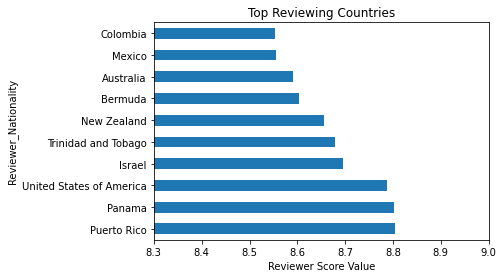

In [13]:
try:
    # Plot for top reviewing countries
    topReviewingCountries = data.Reviewer_Nationality.value_counts()[data.Reviewer_Nationality.value_counts() > 100]
    # Using groupby function to find mean values
    mean = data.groupby("Reviewer_Nationality").mean()
    # Locating the top 10 values
    mean.loc[topReviewingCountries.index.tolist()]["Reviewer_Score"].sort_values(ascending=False)[:10].plot(kind="barh",xlim=(8.3,9),title="Top Reviewing Countries")
    plot.xlabel("Reviewer Score Value")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

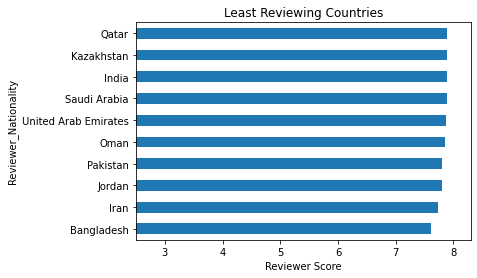

In [14]:
try:
    # Plot for least reviewing countries
    mean.loc[topReviewingCountries.index.tolist()]["Reviewer_Score"].sort_values(ascending=True)[:10].plot(kind="barh",xlim=(2.5,8.3),title="Least Reviewing Countries")
    plot.xlabel("Reviewer Score")
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Heat map to find out the correlation bewtween the variables

I have imported spearmanr module from scipy.stats to Calculate a Spearman correlation coefficient with associated p-value. At first, I am filtering the numeric columns from the dataset. I am getting the correlation value between the numerical datas. If there are missing values, then dropping those values using dropna() function. Then, plotting the correlation relationship between the numerical columns using heatmap(). 

The below heatmap displays the correlation relationship between the variables. The amount of correlation is shown as a number between 1 and -1. The value is 1 means they are the perfect values i.e. positively correlated. If the value is zero then it means that the values are not correlated. If the value is -1 then the values are negatively correlated. If I see the Reviewer_Score column, Reviewer Score and Average score value has higher value (0.36) than the other variables. Similarly, the high value of negative correlation can be seen between Total negative word counts which has value of -0.47. These relationships can be found from this heatmap.

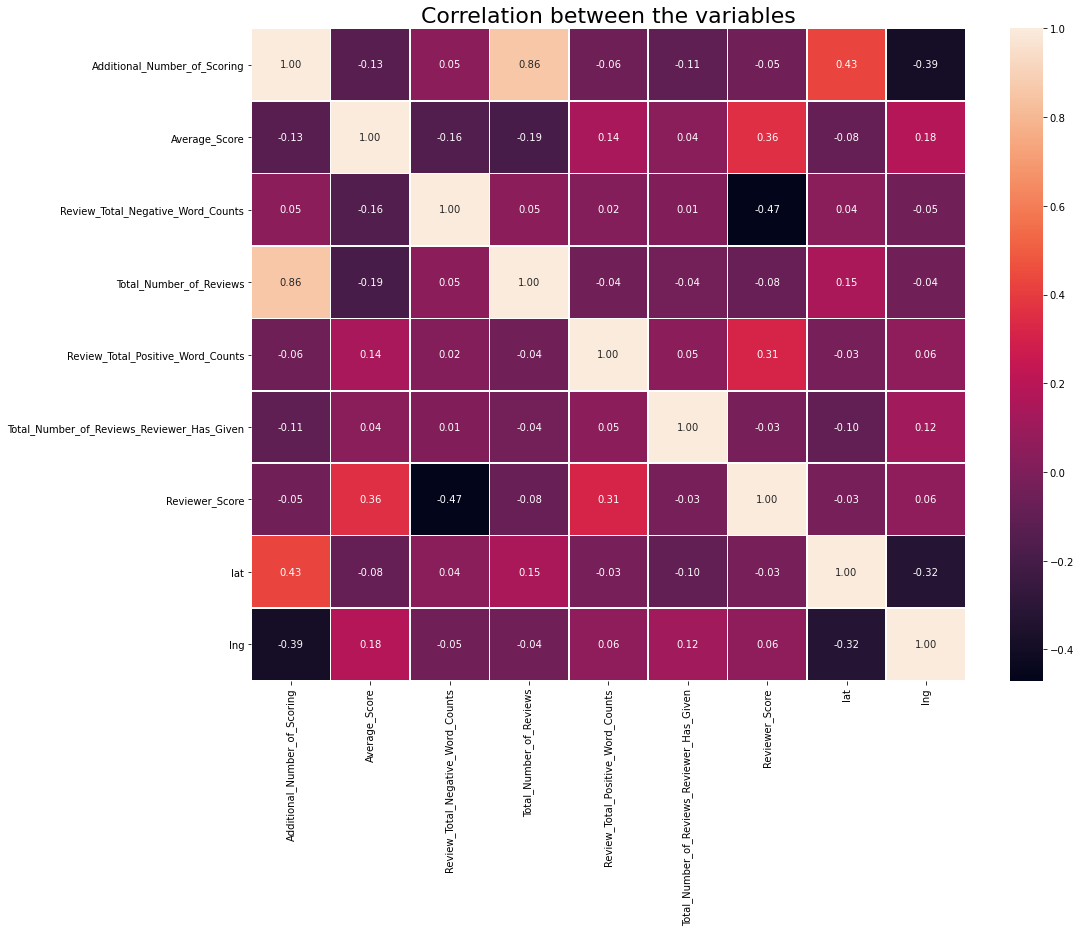

In [15]:
from scipy.stats import spearmanr 

try:
    
    # Filtering the numeric columns 
    # Using a for loop to iterate over all of the columns in the data
    # If the item is numeric, store its value in numerical_columns
    
    numerical_columns = [n for n,col in data.items() if pd.api.types.is_numeric_dtype(col)]
    
    # Getting the correlations between pairs of the numerical columns 
    # The dropna() function of Pandas Data Frame drops all of the missing values
    corr = spearmanr(data[numerical_columns].dropna()).correlation

    plot.figure(figsize=(16,12))
    
    #get the axes and set the title for the plot
    ax = plot.gca()
    ax.set_title("Correlation between the variables",fontsize = 22)


    #in this case we have set the x and y labels as they are not part of the data
    sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5,
           xticklabels=numerical_columns, yticklabels=numerical_columns) 
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Splitting the date column and adding new columns to the dataset

I need the year and date values from the Review_Date column to see how the reviews change for the given month or year for the dataset. Hence, adding two new columns named 'Year' and 'Month'. I am splitting the date values by using datetime module. Then, I have created another column named 'Score' based on the reviewer score values. That is, if the score is greater than 5, then the Score value is 1 else the value will be 0. Then, I have printed the information based on the new data using info(). Hence, the column entries has been changed to 20 attributes.


In [16]:
try:
    # Extracting year,month from Review_Date colum
    data['Year'] = pd.DatetimeIndex(data['Review_Date']).year
    data['Month'] = pd.DatetimeIndex(data['Review_Date']).month
    
    # Creating Score column based on Reviewer_Score
    data["Score"] = np.where(data.eval("Reviewer_Score > 5"), "1", "0")
    
    # Dropping columns that are not needed
    data.drop(columns=['Hotel_Address', 'Review_Date'],inplace=True)
    print("The information of the data :\n")
    data.info()
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

The information of the data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Hotel_Name                                  515738 non-null  object 
 3   Reviewer_Nationality                        515738 non-null  object 
 4   Negative_Review                             515738 non-null  object 
 5   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 6   Total_Number_of_Reviews                     515738 non-null  int64  
 7   Positive_Review                             515738 non-null  object 
 8   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 9   Total_Number_of_Reviews_Reviewer_Has_Gi

### How the total positive and total negative reviews changes for different  months based on the reviewer scores?

For this question, I am plotting the line plot to show the change in different months. Now, I have the Month column values and the total number of postive reviews. I am plotting the x-axis as month values and total positive review count of the standard deviation values on y-axis. I have used standard deviation values to measure the amount of variation and dispersion in the values. From the below plot, I can infer that if the score value is 0 then there is no deviation among the values. But if the score is 1, then there is a deviation in the values. For example, if we see the 11th month value, the dviation is lesser than the other months. Similarly, 8th month has higher positive ratings when compared to the other months.


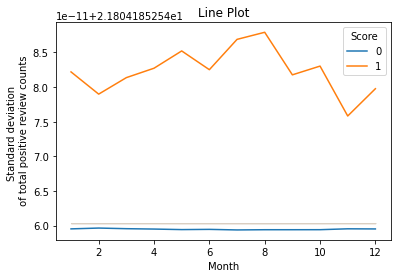

In [17]:
try:
    # Plotting line plot for positive review count
    ax = sns.lineplot(x=data.Month, y=data['Review_Total_Positive_Word_Counts'].std(),hue=data['Score'], data=data)
    ax.set(xlabel = 'Month',ylabel = 'Standard deviation \n of total positive review counts')
    ax.set(title = "Line Plot")
    
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### How the total positive and total negative reviews changes for different  months based on the reviewer scores? (Contd.)

If I see the plot for negative review word count, it varies largely when compared to the Month versus postive review count plot. The same steps has been followed to plot the graph as the above plot. For example, if I take the score value 0, then there is a small deviation/changes in the plot. If the score value is 1, then the plot varies largely based on the score values. Thus, we can say that the relationship with the negative reviews score varies widely when compared to the positive review score plot.

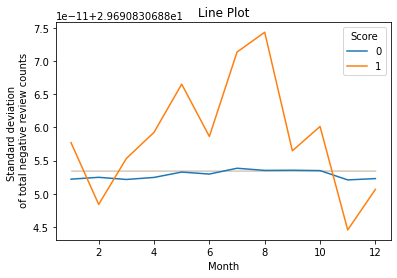

In [18]:
try:
    # Plotting the line plot for negative review count
    ax = sns.lineplot(x=data.Month, y=data['Review_Total_Negative_Word_Counts'].std(),hue=data['Score'], data=data)
    ax.set(xlabel = 'Month',ylabel = 'Standard deviation \n of total negative review counts')
    ax.set(title = "Line Plot")
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Plotting the average review scores based on the reviewer total positive counts the reviewer has given:

In the below code, I am plotting the scatter plot to show the distributions across average score and the total number of positive counts the reviewer has given. 

From this plot, I can infer that the average score values are widely distributed based on the reviewers positive word count in the plot. I am displaying that with the Score value i.e. I see that the reviewer score value is greater than 5 in most cases and only few has reviewer score value less than 5. 

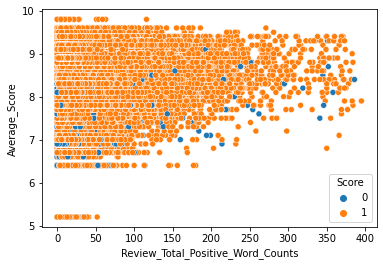

In [19]:
try:
    # Plotting the scatter plot 
    ax = sns.scatterplot(x=data["Review_Total_Positive_Word_Counts"], y=data['Average_Score'],hue = data["Score"])
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

### Find the proportion of foreigner reviewer nationality who stayed in a particular country?

In the below code, I have copied the dataframe using copy() function. I have replaced the country value of 'United Kingdom' to 'UK' and 'United Arab Emirates' as 'UAE' for plotting the chart with country values in a clear manner. To show the proportion values, I am going to plot a pie chart. I have defined the function piechart() that take the countries value to do the necessary steps to find the proportion. First, I have to see whether the Country value is equal to the specific country. Then, I have to create a dataframe with only those values in the dataset. From that smaller set, I have to take the reviewer nationality which is same as the hotel country, such that I will be able to find a proprtion of foreign reviewers for each specific country. Again, extracting out the desired values and storing it in new dataframe 'c1'. Then, by using value counts function I am extracting the top five largest values and storing it in unique_counts. I am  plotting the pie chart based on the reviewer nationality count values for each country. For example, If I take the country as Netherlands, I can see that most of the UK country people stayed the most in the hotels of Netherlands.

In [20]:
try:
    # Copying dataframe 
    data_copy = data.copy()
    # Replacing the Country name 
    data_copy['Reviewer_Nationality'].replace(to_replace ="United Kingdom",
                  value ="UK",inplace = True)
    data_copy['Reviewer_Nationality'].replace(to_replace ="United Arab Emirates",
                  value ="UAE",inplace = True)
    data_copy['Country'].replace(to_replace ="United Kingdom",
                  value ="UK",inplace = True)
    # Defining function that takes country values
    def piechart(country):
        
        # Checking if the country is equal
        data_country = data_copy['Country'] == country

        # Creating a dataframe with that condition
        data1 = pd.DataFrame(data_copy[data_country])
        
        # Checking the Reviewer_Nationality not equal to the specified country
        nation = data1["Reviewer_Nationality"] != country
        
        # Extracting the desired values based on the condition
        c1 = pd.DataFrame(data1[nation])
        
        # Using value_counts() value taking the Nationality count
        unique_counts = c1["Reviewer_Nationality"].value_counts().nlargest(5)
        
        print("Pie chart for ",country)
        # Plotting pie plot 
        unique_counts.plot.pie(autopct='%1.1f%%', 
                            figsize=(8,8), 
                            title = 'Pie chart distribution for top 5 countries based on Reviewers Nationality',
                            startangle=90,
                            rotatelabels = False,
                            fontsize = 10)
        
        # Setting y axis label
        plot.ylabel('Reviewer Nationality')
        plot.figure(0)
        #plot.legend()
        plot.show()
        
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

In the below code, I am getting the list of countries values and by this list, I am calling the function piechart() to plot different charts for each countries.

Pie chart for  Netherlands


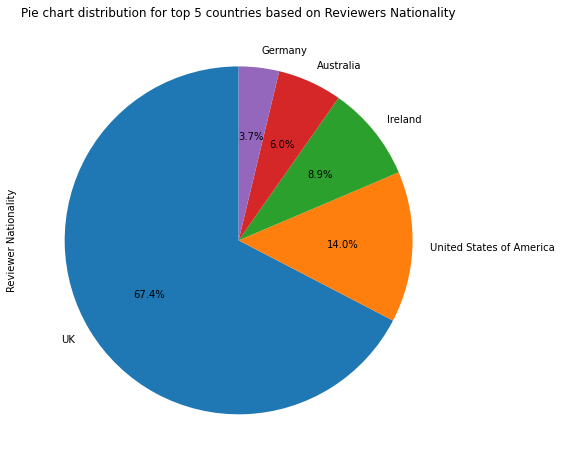

<Figure size 432x288 with 0 Axes>


Pie chart for  UK


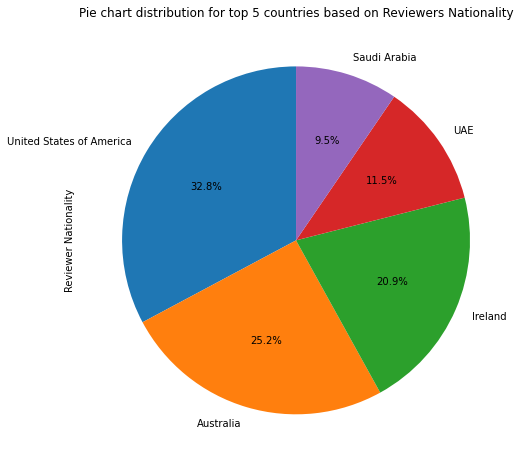

<Figure size 432x288 with 0 Axes>


Pie chart for  France


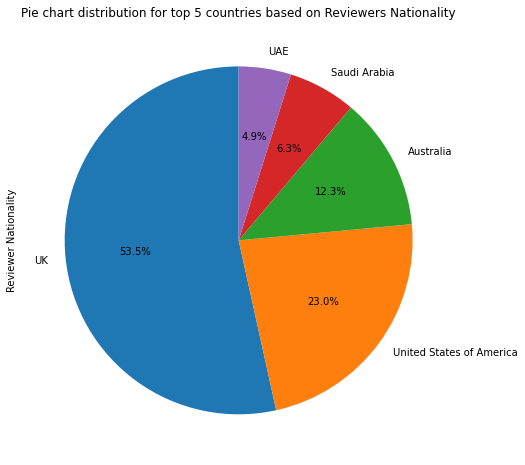

<Figure size 432x288 with 0 Axes>


Pie chart for  Spain


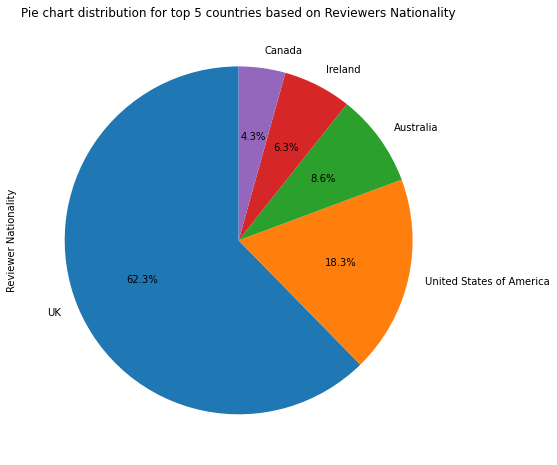

<Figure size 432x288 with 0 Axes>


Pie chart for  Italy


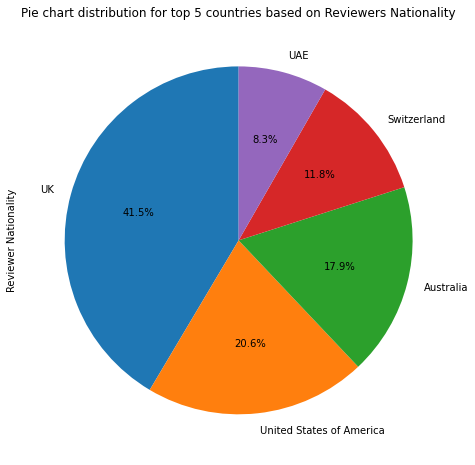

<Figure size 432x288 with 0 Axes>


Pie chart for  Austria


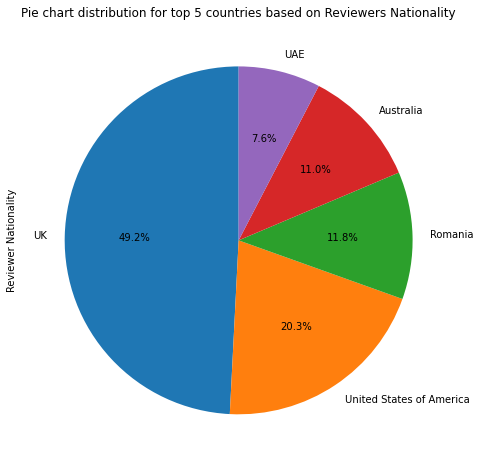

<Figure size 432x288 with 0 Axes>

In [21]:
try:
    # Initialising an empty list
    listsOfCountries = []

    # Using for loop through the unique countries
    for i in (data_copy['Country'].unique()):
    
        # Appending the values to the list
        listsOfCountries.append(i)

    # Using for loop
    for j in listsOfCountries:
    
        # calling the function piechart()
        piechart(j)
        print("")
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   

### Finding the best and worst hotels scores across different cities and plotting the graph:

I have created a function named 'barplot' that takes city values as the parameter. Then, I am seeing the condition whether the city is equal to the column, if that is equal and the value is true, I am creating the dataframe only for those values. Then, for the smaller subset I am finding the minimum and maximum average score values. For minimum values, I am creating the dataframe and sorting that with the total number of reviews column. Here, I found out the worst hotel record in the index value 0. Similarly, I am finding the maximum average score values and creating the subset of maximum values in a another dataframe. Then, sorting the values based on total number of reviews and extracting out the first record value. Here, we need city, best hotel name, best score value, worst hotel name and worst hotel score value. These values I am taking from the dataframe.column_name.values[0] to get the desired values for plotting the graph. After getting these values, I have created the dictionary with the these values and returned the dataframe of dictionary values.


In [22]:
try:
    def barplot(city):
        
        c1 = data_copy['City'] == city

        c1 = pd.DataFrame(data_copy[c1])

        mini = c1['Average_Score'].min()
        maxi = c1['Average_Score'].max()

    
        c2 = c1['Average_Score'] == mini 
        l = pd.DataFrame(c1[c2])
    
        l.sort_values("Total_Number_of_Reviews", axis = 0, ascending = True,
                 inplace = True)
  
    
        c3 = c1['Average_Score'] == maxi
        b = pd.DataFrame(c1[c3])
        b.sort_values("Total_Number_of_Reviews", axis = 0, ascending = True,
                 inplace = True)
        b = b.iloc[[0]]
        city = b.City.values[0]
        hotel = b.Hotel_Name.values[0]
        score = b.Average_Score.values[0]
        l = l.iloc[[0]] 
        hotel1 = l.Hotel_Name.values[0]
        score1 = l.Average_Score.values[0]

        dic = {'City':[city],'Best Hotel':[hotel],'Best Hotel Score':[score],'Worst Hotel':[hotel1],'Worst Hotel Score':[score1]}
    
    
        return pd.DataFrame.from_dict(dic)
    
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   

### Finding the best and worst hotels scores across different cities and plotting the graph: (contd.)

Here in the below code, I am getting the list of cities values by using for loop. I have created an empty dataframe with the desired columns. Then, passing through the list of cities, I am calling the barplot() function to do the above steps to find the best and worst hotel record value based on average score and as well as the total number of reviews. The returned dataframe values will be appended to the df dataframe. Then the df value will be based on the best and worst hotels:


| City | Best Hotel	|Best Hotel Score|	Worst Hotel	|Worst Hotel Score |
| --- | --- | --- | --- | --- |
| Amsterdam | Waldorf Astoria Amsterdam | 9.5	|Savoy Hotel Amsterdam |	6.4
| London | 41 |	9.6 |	Hotel Cavendish	| 6.4 
| Paris |	Ritz Paris	| 9.8 |	Villa Eugenie	| 6.8 
| Barcelona	| H10 Casa Mimosa 4 Sup |	9.6	| Eurohotel Diagonal Port |	7.0
| Milan |	Excelsior Hotel Gallia Luxury Collection Hotel |	9.4 |	Hotel Liberty |	5.2
| Vienna |	Palais Coburg Residenz | 9.5 | Best Western Hotel Pension Arenberg Wien Zentrum	| 7.7

Then, I am plotting these values based on City on x-axis and best hotel score and worst hotel score on y-axis. Now, I plotted the best and worst hotels score in the given dataset based on cities.



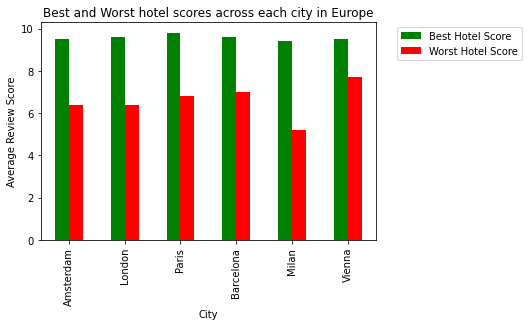

In [23]:
try:
    
    # Initialising an empty list
    listsOfCities = []

    # Parsing through the unique countries
    for i in (data_copy['City'].unique()):
    
        # Appending the values to the list
        listsOfCities.append(i)
    
    column_names = ["City", "Best Hotel", "Best Hotel Score","Worst Hotel","Worst Hotel Score"]

    df = pd.DataFrame(columns = column_names)

    for city in listsOfCities:
        frame = barplot(city)

        df = df.append(frame,ignore_index = True)

    X="City"
    Y=["Best Hotel Score", "Worst Hotel Score"]

    # plotting graph
    ax = df.plot(x=X, y=Y, kind="bar",color = ['g','r'])

    plot.ylabel("Average Review Score")
    # Placing legend outside the figure using bbox_to_anchor value
    plot.legend(bbox_to_anchor=(1.05, 1))
    plot.title("Best and Worst hotel scores across each city in Europe")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   

### Distribution of Paris hotel ratings over the years

In the below code, I have taken the city 'Paris' and displayed how the average score values for the city varies over the years. I have created a dataframe which has only city values as Paris and plotted the stripplot over the years. The stripplot() draws scatter plot where one variable can be categorical. I have plotted the Year in x-axis and Average Score values in y-axis. From this plot, I infer that over the years the ratings has been increased. If I compare the year 2015 and 2016, 2016 has high average score value when compared to 2015. 2016 and 2017 the average score value has been the same. Similarly, if I compare the least score values 2015 has least score values when compared to 2016 and 2017. 

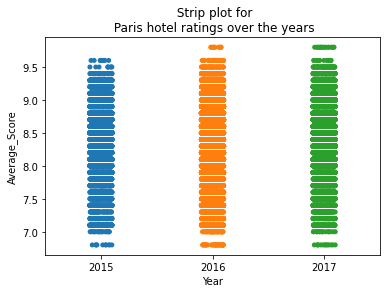

In [24]:
try:
    x = data_copy.City == 'Paris'
    d = pd.DataFrame(data_copy[x])

    # Using strip plot 
    ax = sns.stripplot(x=d.Year,y=d['Average_Score'])
    ax.set_title(" Strip plot for\n Paris hotel ratings over the years")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   